In [1]:
import pandas as pd

### Data Loading

In [2]:
from google.colab import files
uploaded = files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data (2).csv


In [3]:
stroke_clean = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
# Menghilangkan ID pada dataset
stroke_clean

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### Deskripsi Variabel

In [4]:
stroke_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### Menangani Missing Varible

In [5]:
bmi = (stroke_clean.bmi.isnull()).sum()
 
print("Nilai 0 di kolom BMI ada: ", bmi)

Nilai 0 di kolom BMI ada:  201


In [6]:
stroke_clean.loc[(stroke_clean['bmi'].isnull())]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [7]:
print("Banyaknya Data BMI yang kosong adalah {}".format(len(stroke_clean.loc[(stroke_clean['bmi'].isnull())])))

Banyaknya Data BMI yang kosong adalah 201


In [8]:
# Drop baris dengan nilai BMI yang null
stroke_data = stroke_clean.loc[(stroke_clean[['bmi']].notnull()).all(axis=1)]
 
# Cek ukuran data untuk memastikan baris sudah di-drop
stroke_data.shape
stroke_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [9]:
stroke_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,37064.313506,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,20995.098457,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,77.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,18605.000000,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,37608.000000,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,55220.000000,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Outliers

In [10]:
import seaborn as sns

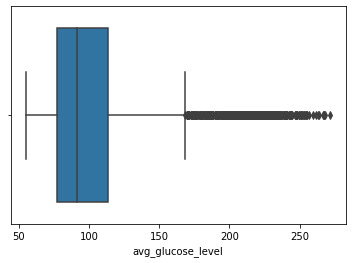

In [11]:
sns.boxplot(x=stroke_data['avg_glucose_level'])

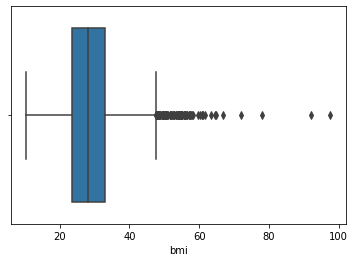

In [12]:
sns.boxplot(x=stroke_data['bmi'])

In [13]:
stroke_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,37064.313506,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,20995.098457,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,77.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,18605.000000,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,37608.000000,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,55220.000000,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Univariate Analysis

In [14]:
numerical_features = ['stroke', 'hypertension', 'heart_disease', 'age', 'avg_glucose_level', 'bmi', 'id']
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

#### Categorical

        jumlah sampel  persentase
Female           2897        59.0
Male             2011        41.0
Other               1         0.0


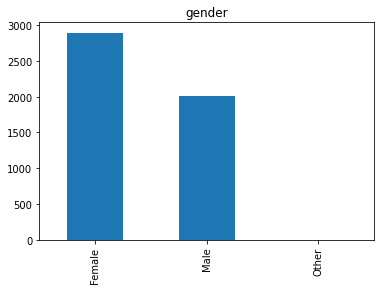

In [15]:
feature = categorical_features[0]
count = stroke_data[feature].value_counts()
percent = 100*stroke_data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

     jumlah sampel  persentase
Yes           3204        65.3
No            1705        34.7


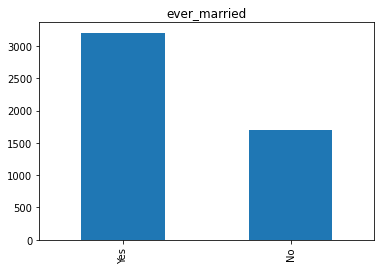

In [16]:
feature = categorical_features[1]
count = stroke_data[feature].value_counts()
percent = 100*stroke_data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

               jumlah sampel  persentase
Private                 2811        57.3
Self-employed            775        15.8
children                 671        13.7
Govt_job                 630        12.8
Never_worked              22         0.4


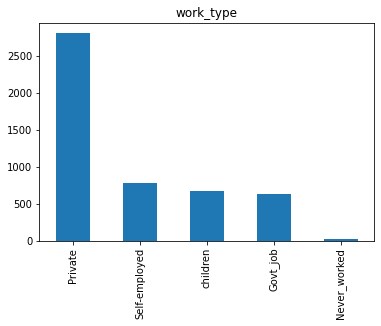

In [17]:
feature = categorical_features[2]
count = stroke_data[feature].value_counts()
percent = 100*stroke_data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

       jumlah sampel  persentase
Urban           2490        50.7
Rural           2419        49.3


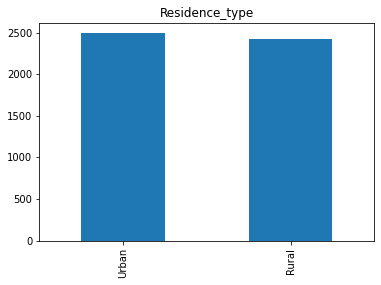

In [18]:
feature = categorical_features[3]
count = stroke_data[feature].value_counts()
percent = 100*stroke_data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

                 jumlah sampel  persentase
never smoked              1852        37.7
Unknown                   1483        30.2
formerly smoked            837        17.1
smokes                     737        15.0


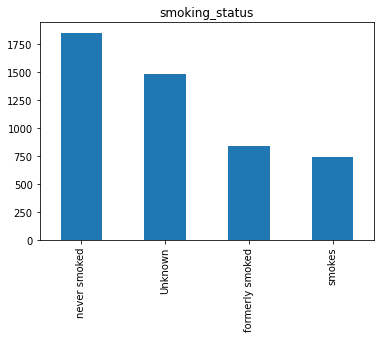

In [19]:
feature = categorical_features[4]
count = stroke_data[feature].value_counts()
percent = 100*stroke_data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

#### Numerical

In [20]:
import matplotlib.pyplot as plt
import plotly.express as px

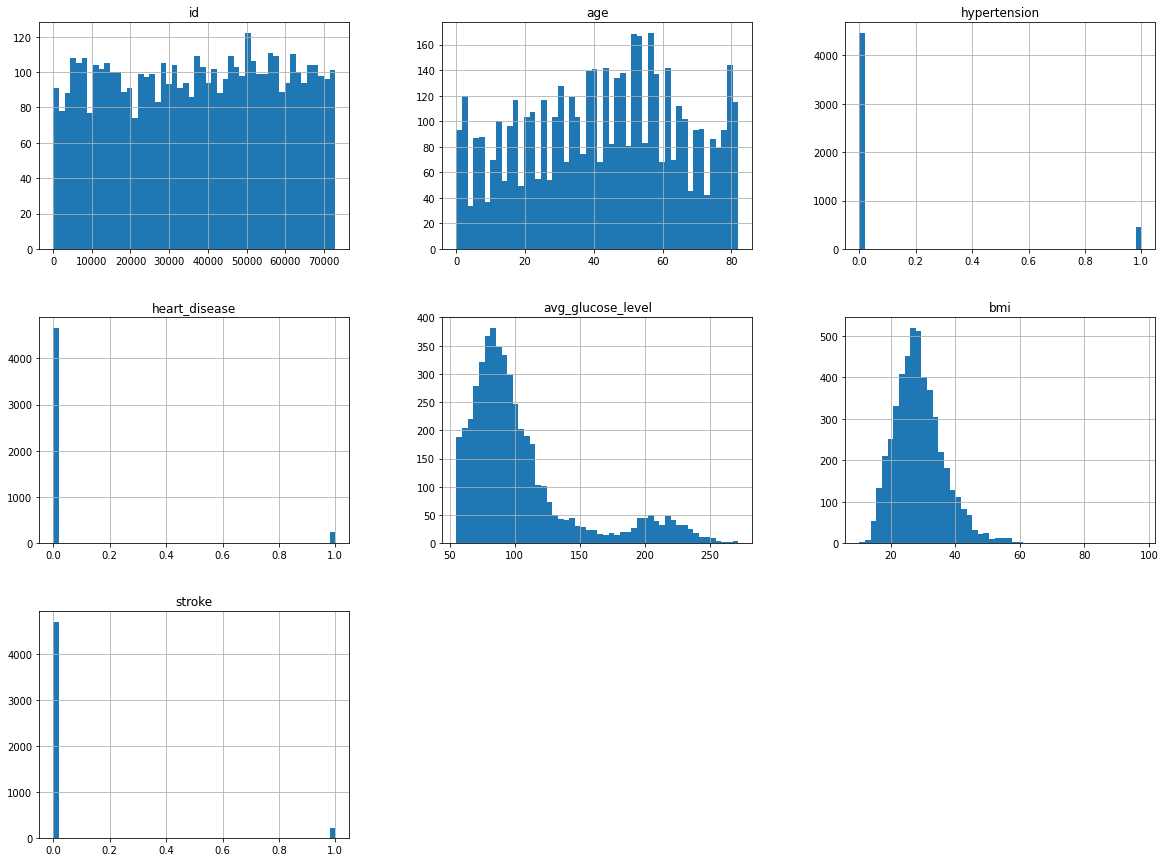

In [21]:
stroke_data.hist(bins=50, figsize=(20,15))
plt.show()

### Multivariate Analysis

In [22]:
stroke_data['stroke'].value_counts()

0    4700
1     209
Name: stroke, dtype: int64

In [23]:
for i in stroke_data.drop(['stroke'], axis=1).columns:
    fig = px.histogram(stroke_data, x=i, color='stroke')
    fig.show()

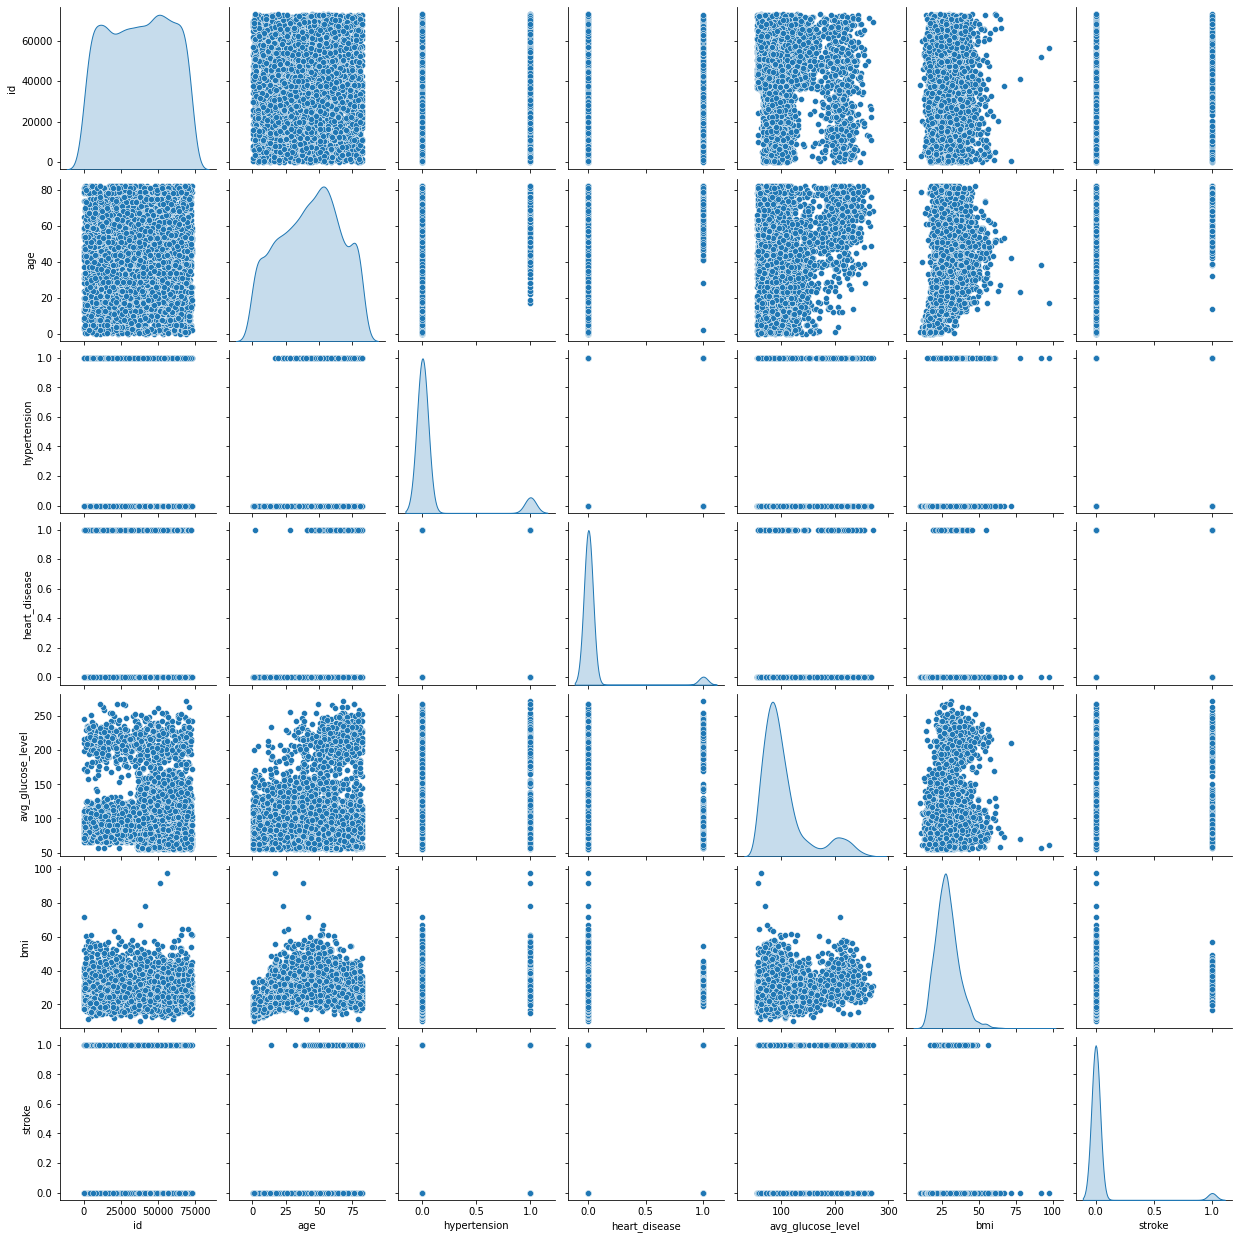

In [24]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(stroke_data, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

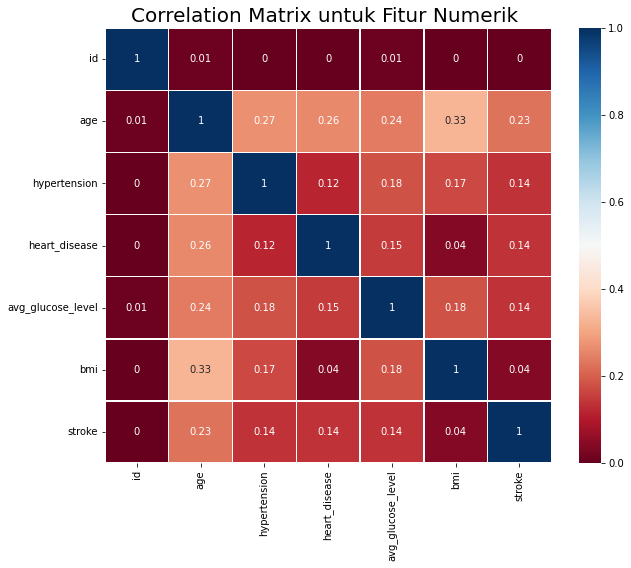

In [25]:
plt.figure(figsize=(10, 8))
correlation_matrix = stroke_data.corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='RdBu', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Fitur 'id' memiliki korelasi yang sangat kecil. Sehingga, fitur tersebut dapat di-drop.

In [26]:
stroke_data.drop(['id'], inplace=True, axis=1)
stroke_data.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [27]:
from sklearn.preprocessing import  OneHotEncoder
stroke_data = pd.concat([stroke_data, pd.get_dummies(stroke_data['gender'], prefix='gender')],axis=1)
stroke_data = pd.concat([stroke_data, pd.get_dummies(stroke_data['ever_married'], prefix='ever_married')],axis=1)
stroke_data = pd.concat([stroke_data, pd.get_dummies(stroke_data['work_type'], prefix='work_type')],axis=1)
stroke_data = pd.concat([stroke_data, pd.get_dummies(stroke_data['Residence_type'], prefix='Residence_type')],axis=1)
stroke_data = pd.concat([stroke_data, pd.get_dummies(stroke_data['smoking_status'], prefix='smoking_status')],axis=1)
stroke_data.drop(['gender','ever_married','work_type', 'Residence_type', 'smoking_status'], axis=1, inplace=True)
stroke_data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
2,80.0,0,1,105.92,32.5,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
5,81.0,0,0,186.21,29.0,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0


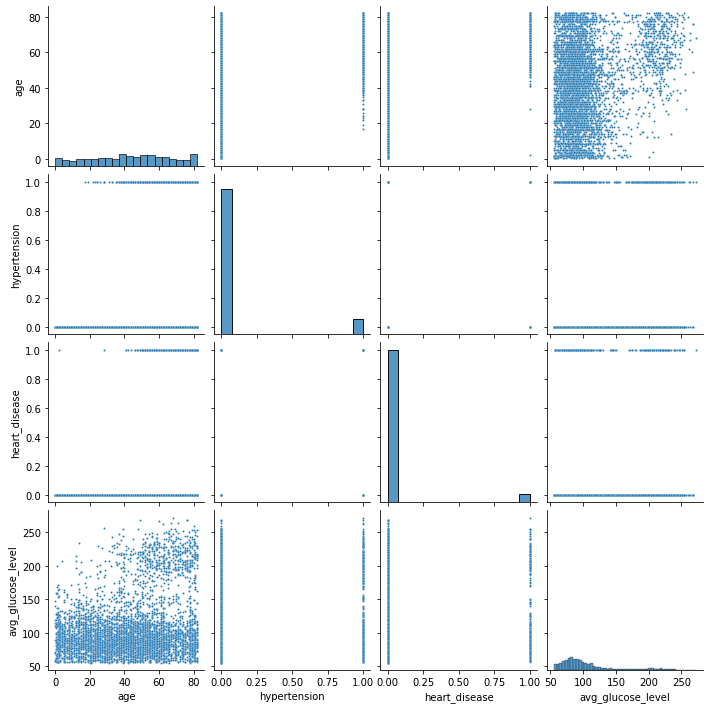

In [28]:
sns.pairplot(stroke_data[['age','hypertension','heart_disease', 'avg_glucose_level']], plot_kws={"s": 4});

In [29]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components=3, random_state=123)
pca.fit(stroke_data[['age','hypertension','heart_disease', 'avg_glucose_level']])
princ_comp = pca.transform(stroke_data[['age','hypertension','heart_disease', 'avg_glucose_level']])

In [30]:
pca.explained_variance_ratio_.round(3)

array([0.81, 0.19, 0.  ])

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1, random_state=123)
pca.fit(stroke_data[['age','hypertension','heart_disease', 'avg_glucose_level']])
stroke_data['dimension'] = pca.transform(stroke_data.loc[:, ('age','hypertension','heart_disease', 'avg_glucose_level')]).flatten()
stroke_data.drop(['age','hypertension','heart_disease', 'avg_glucose_level'], axis=1, inplace=True)
stroke_data

,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,dimension
0,36.6,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,125.637078
2,32.5,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,6.379605
3,34.4,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,66.076961
4,24.0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,73.595790
5,29.0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,85.848428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,18.6,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,-6.840017
5106,40.0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,25.579887
5107,30.6,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,-23.266566
5108,25.6,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,61.507842


#### Train Test Split

In [32]:
from sklearn.model_selection import train_test_split
 
X = stroke_data.drop(["stroke"],axis =1)
y = stroke_data["stroke"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [33]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 4909
Total # of sample in train dataset: 4418
Total # of sample in test dataset: 491


#### Standarisasi

In [34]:
from sklearn.preprocessing import StandardScaler
 
numerical_features = ['bmi', 'dimension']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,bmi,dimension
3775,-0.953676,-0.403944
863,1.257959,0.136524
1072,-0.157488,-0.181835
3379,-0.523987,-0.676319
1898,3.633886,1.881159


In [35]:
X_train[numerical_features].describe().round(4)

,bmi,dimension
count,4418.0000,4418.0000
mean,-0.0000,-0.0000
std,1.0001,1.0001
min,-2.3565,-1.2382
25%,-0.6756,-0.6348
50%,-0.1069,-0.3102
75%,0.5250,0.1780
max,8.6764,3.7593


## Model Development

### Model Development dengan KNN

In [36]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

In [39]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
 
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

### Model Development dengan Random Forest

In [42]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor
 
# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)     

### Model Development dengan Boosting Algorithm

In [44]:
from sklearn.ensemble import AdaBoostRegressor
 
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)                             
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

## Evaluasi Model

In [45]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [46]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
 
# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
 
# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
# Panggil mse
mse

,train,test
KNN,0.000036,0.000051
RF,0.000008,0.00005
Boosting,0.000043,0.000048


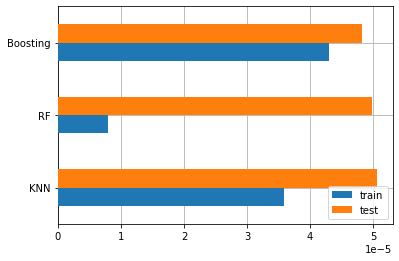

In [47]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [48]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
101,1,0.0,0.0,0.2
